# Advanced Lane Lines Project

This is the project implementation for the second project in the Udacity Self Driving Car Engineer Nanodegree program.

# Project Requirements / Steps

The goals / steps of this project are the following:

* Compute the camera calibration matrix and distortion coefficients given a set of chessboard images.
* Apply a distortion correction to raw images.
* Use color transforms, gradients, etc., to create a thresholded binary image.
* Apply a perspective transform to rectify binary image ("birds-eye view").
* Detect lane pixels and fit to find the lane boundary.
* Determine the curvature of the lane and vehicle position with respect to center.
* Warp the detected lane boundaries back onto the original image.
* Output visual display of the lane boundaries and numerical estimation of lane curvature and vehicle position.

In [1]:
# required modules
import io
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import math
import glob
import cv2
import numpy as np

%matplotlib inline

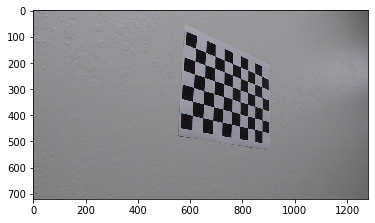

In [7]:
cal_set = []
for image in glob.glob('./camera_cal/calibration*.jpg'):
    n = mpimg.imread(image)
    cal_set.append(n)

plt.imshow(cal_set[10])

True


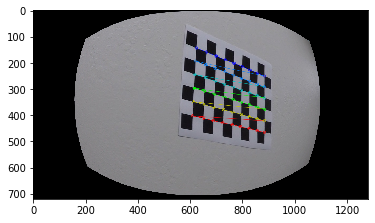

In [8]:

cal_set = []
for image in glob.glob('./camera_cal/calibration*.jpg'):
    n = mpimg.imread(image)
    cal_set.append(n)

img = cal_set[10]
# initialzing
imgpoints = [] # 2d image world
objpoints = [] # 3d image world

objp = np.zeros((6*9,3), np.float32) # size of array is 9 by 6
objp[:,:2] = np.mgrid[0:9,0:6].T.reshape(-1,2) # x and y coordinates

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
img_size = (img.shape[1], img.shape[0])
ret,corners = cv2.findChessboardCorners(gray, (9,6), None)
print(ret)
if ret == True:
    imgpoints.append(corners)
    objpoints.append(objp)

    img = cv2.drawChessboardCorners(img,(9,6),corners,ret)

    ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size , None, None)
    dst = cv2.undistort(img, mtx, dist, None, mtx)

    plt.imshow(dst)
    plt.show()